In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = read_csv('data/CO2-spot_Savoy.csv',
              skiprows=1,
              parse_dates=True,
              index_col=1
             )

Text(0, 0.5, 'pCO2 (ppm)')

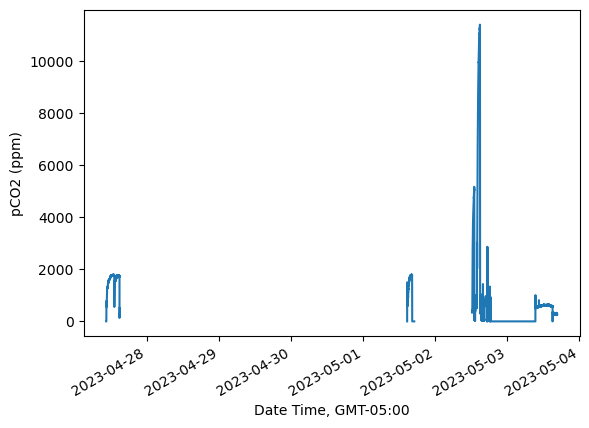

In [4]:
CO2 = df['ppm, units (LGR S/N: 20253808)']
CO2.plot()
plt.ylabel('pCO2 (ppm)')

Text(0, 0.5, 'pCO2 (ppm)')

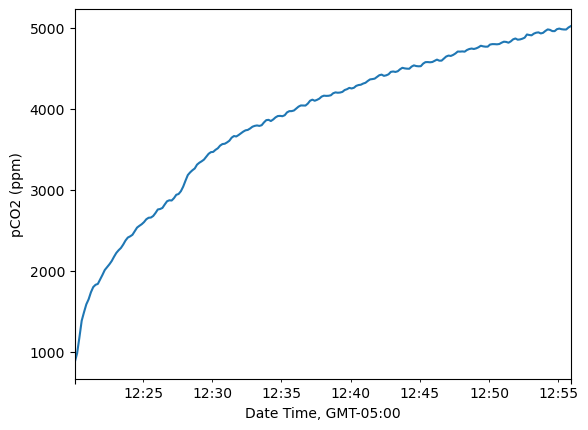

In [6]:
start = '2023-05-02 12:20'
end = '2023-05-02 12:55'
CO2 = df['ppm, units (LGR S/N: 20253808)']
CO2[start:end].plot()
plt.ylabel('pCO2 (ppm)')

In [7]:
CO2_meas = CO2[start:end]

In [15]:
time_from_start = CO2_meas.index - CO2_meas.index[0]
secs_from_start = time_from_start.total_seconds()

Text(0, 0.5, 'CO2  (ppm)')

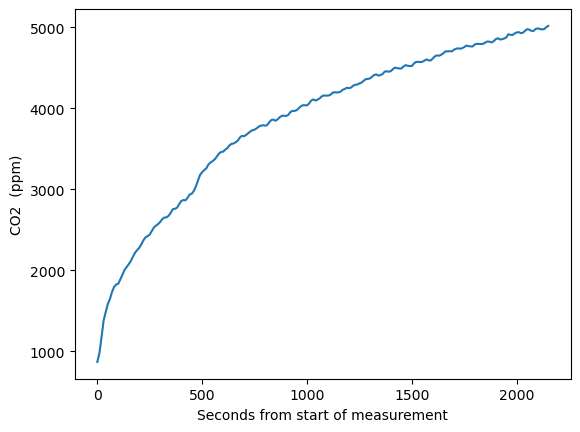

In [20]:
plt.plot(secs_from_start,CO2_meas)
plt.xlabel('Seconds from start of measurement')
plt.ylabel('CO2  (ppm)')

In [24]:
#Define and exponential curve to fit

def exp_curve(t, A,B,C):
    y = A*(1 - np.exp(-t/B)) + C
    return y

In [25]:
from scipy.optimize import curve_fit

In [34]:
p_guess = [6000,500,1000]
p_opt, p_cov = curve_fit(exp_curve, secs_from_start, CO2_meas,p_guess) 

In [35]:
A_best = p_opt[0]
B_best = p_opt[1]
C_best = p_opt[2]

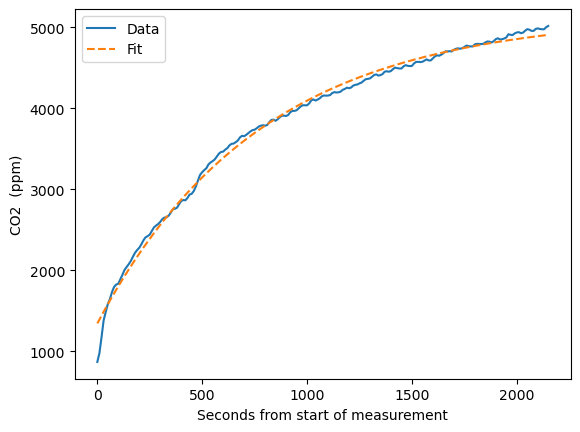

In [41]:
co2_fit = exp_curve(secs_from_start, A_best, B_best, C_best)
plt.plot(secs_from_start,CO2_meas)
plt.plot(secs_from_start, co2_fit, '--')
plt.xlabel('Seconds from start of measurement')
plt.ylabel('CO2  (ppm)')
plt.legend(['Data', 'Fit']);

In [38]:
print('A_best =',A_best)
print('B_best =',B_best)
print('C_best =',C_best)

print('Final CO2 =', A_best + C_best)

A_best = 3800.6800989780836
B_best = 778.0401390858792
C_best = 1346.1297240220683
Final CO2 = 5146.809823000152
